<h1>Lesson 3, Tabular Models</h1>

|  | Monday 4-5:30pm | Friday  4-5:30pm |
|:------:|:-------------------------------------------:|:--------------------------------------------------------------------------:|
| **Week 1** | Introduction | Introduction |
| **Week 2** | Custom computer vision tasks | State of the art in Computer Vision |
| **Week 3** | **Introduction to Tabular modeling and pandas** | Pandas workshop and feature engineering |
| **Week 4** | Tabular and Image Regression | Feature importance and advanced feature  engineering |
| **Week 5** | Natural Language Processing | State of the art in NLP |
| **Week 6** | Segmentation and Kaggle | Audio |
| **Week 7** | Computer vision from scratch | NLP from scratch |
| **Week 8** | Callbacks | Optimizers |
| **Week 9** | Generative Adversarial Networks | Research time / presentations |
| **Week 10** | Putting models into production | Putting models into production |

* What is "Tabular" data?
  * Numerical in nature
  * We can have categories as well with "Cardinality"
  * eg. Months, Days, Years
  * eg. Grade, Money Earned
  
* Why use Deep Learning and not Random Forests et al?
  * We can use powerful categorical embeddings based on Word2Vec embeddings
  * These allow for large dimensional representations of categorical variables

# New code

`Categorify`: [docs](https://docs.fast.ai/tabular.transform.html#Categorify) [source](https://github.com/fastai/fastai/blob/master/fastai/tabular/transform.py#L133)

`FillMissing`: [docs](https://docs.fast.ai/tabular.transform.html#FillMissing) [source](https://github.com/fastai/fastai/blob/master/fastai/tabular/transform.py#L150)

`Normalize`: [docs](https://docs.fast.ai/tabular.transform.html#Normalize) [source](https://github.com/fastai/fastai/blob/master/fastai/tabular/transform.py#L181)

`TabularList`: [docs](https://docs.fast.ai/tabular.data.html#TabularList) [source](https://github.com/fastai/fastai/blob/master/fastai/tabular/data.py#L104)

# Libraries for Today:

In [0]:
import pandas as pd
from fastai import *
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

We first need to declare our variable types, what are Categorical, what are Continuous, and what is our Dependant Variables.

In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']

Next we declare our processors, or 'procs'

In [0]:
procs = [FillMissing, Categorify, Normalize]

Next let's use the DataBlock API. 

It is built on the following:

1. Some "list" that grabs our data
2. Split that list into training and validation
3. Label our data
4. (Optionally) Augment the data
5. Turn our data into a databunch (a bunch of data/batches)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .databunch())

In [0]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,False,-0.7760,-0.0893,-0.4224,<50k
Private,9th,Never-married,Handlers-cleaners,Own-child,Black,False,-0.7760,-0.0044,-1.9869,<50k
Private,HS-grad,Divorced,Sales,Unmarried,White,False,-0.1163,-1.0874,-0.4224,<50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,-0.2629,-1.2777,-0.4224,<50k
Private,Bachelors,Never-married,Sales,Not-in-family,White,False,-0.9226,0.7626,1.1422,<50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,0.4701,-0.3229,-0.4224,>=50k
Federal-gov,Some-college,Divorced,Exec-managerial,Not-in-family,White,False,-0.0430,-1.3425,-0.0312,<50k
State-gov,HS-grad,Never-married,Craft-repair,Unmarried,White,False,-0.9226,-1.2877,-0.4224,<50k
?,Assoc-voc,Married-civ-spouse,?,Wife,White,False,-0.1896,-1.2905,0.3599,<50k
Private,HS-grad,Never-married,#na#,Unmarried,White,False,-1.3624,1.2637,-0.4224,<50k


Next we need to create our model, we will be using `tabular_learner`

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

Note the embedding matrix below. Let's try to map them all back to each other? (You will need to rerun your cat_names declaration)

In [0]:
learn.model.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(17, 8)
  (2): Embedding(8, 5)
  (3): Embedding(16, 8)
  (4): Embedding(7, 5)
  (5): Embedding(6, 4)
  (6): Embedding(3, 3)
)

In [0]:
for _, var in enumerate(cat_names):
  print(f'{var}, {df[var].nunique()}')

workclass, 9
education, 16
marital-status, 7
occupation, 15
relationship, 6
race, 5


Why is it one more? Each category can also have a `_na` which deals with if we have a new category option

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


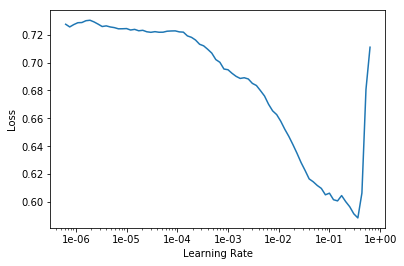

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.373548,0.372446,0.805000,00:06
1,0.368130,0.405121,0.790000,00:06
2,0.355638,0.371216,0.830000,00:06


Why not do a slice() like we had last time?

We are not doing transfer learning here, so it is not needed. Along with this, we do not have seperate layer groups

In [0]:
len(learn.layer_groups)

1

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

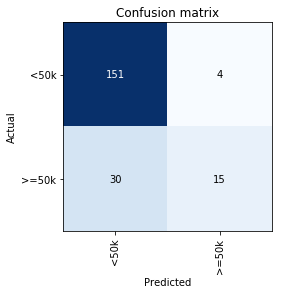

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[('>=50k', '<50k', 30), ('<50k', '>=50k', 4)]

In [0]:
interp.plot_top_losses(k=10)

,Prediction,Actual,Loss,Probability,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
0,<50k,>=50k,5.17,0.01,State-gov,11th,Widowed,Other-service,Unmarried,White,False,1.6428,-0.2826,-1.2046
1,<50k,>=50k,2.73,0.07,Private,Some-college,Never-married,#na#,Not-in-family,White,True,-0.2629,3.7932,-0.0312
2,<50k,>=50k,2.46,0.09,Private,HS-grad,Married-civ-spouse,#na#,Wife,White,False,-1.1425,-1.1779,-0.4224
3,<50k,>=50k,2.46,0.09,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,True,0.6899,-1.6063,-0.0312
4,<50k,>=50k,2.28,0.10,Private,Assoc-voc,Divorced,Sales,Not-in-family,White,False,-0.1163,-0.4977,0.3599
5,<50k,>=50k,2.02,0.13,Private,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,True,-0.9959,-0.7465,-0.0312
6,<50k,>=50k,1.80,0.17,Private,Bachelors,Never-married,#na#,Not-in-family,White,True,1.2763,-0.0082,-0.0312
7,<50k,>=50k,1.51,0.22,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,True,-0.9959,-0.3297,-0.0312
8,<50k,>=50k,1.41,0.25,Federal-gov,Bachelors,Divorced,Prof-specialty,Not-in-family,White,True,0.8365,1.1172,-0.0312
9,>=50k,<50k,1.36,0.26,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,True,0.4701,-0.6541,-0.0312


# ClassConfusion (again)

In [0]:
!git clone https://github.com/muellerzr/ClassConfusion.git

Cloning into 'ClassConfusion'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 334 (delta 28), reused 0 (delta 0), pack-reused 284
Receiving objects: 100% (334/334), 2.13 MiB | 4.35 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [0]:
from ClassConfusion import *

In [0]:
interp.most_confused()

[('>=50k', '<50k', 30), ('<50k', '>=50k', 4)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/10 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

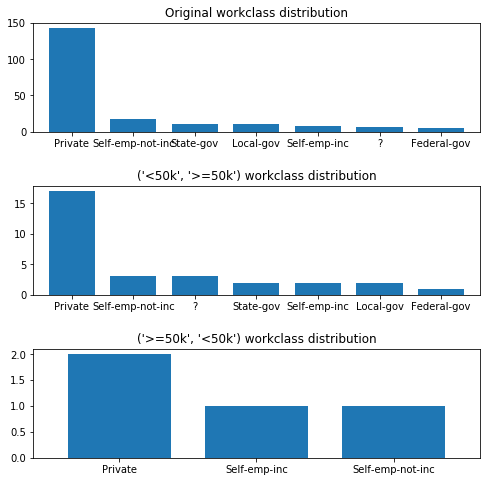

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

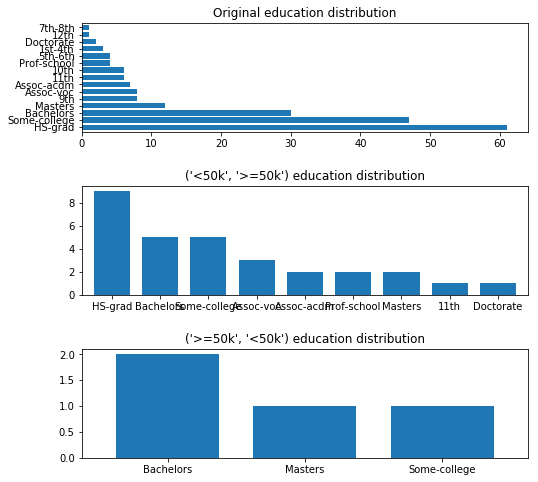

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

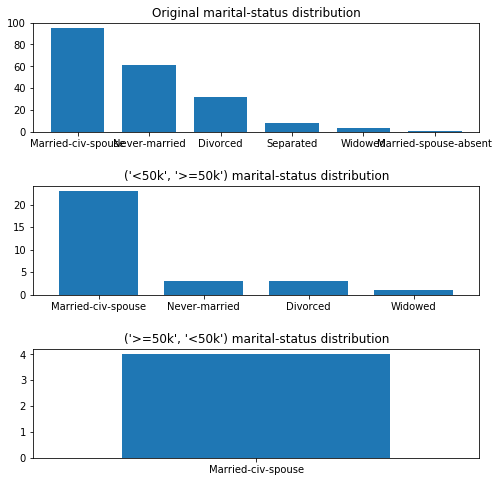

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

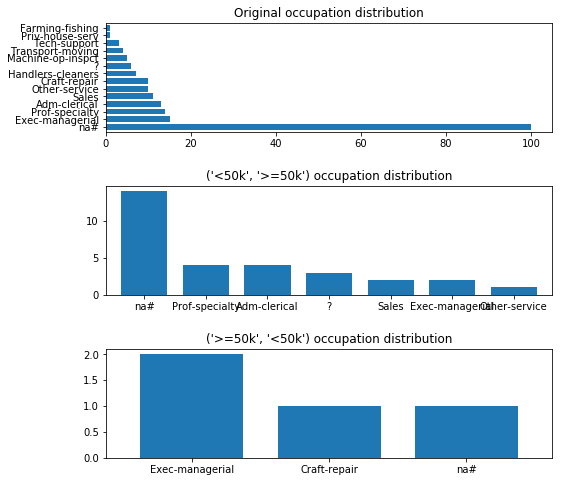

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

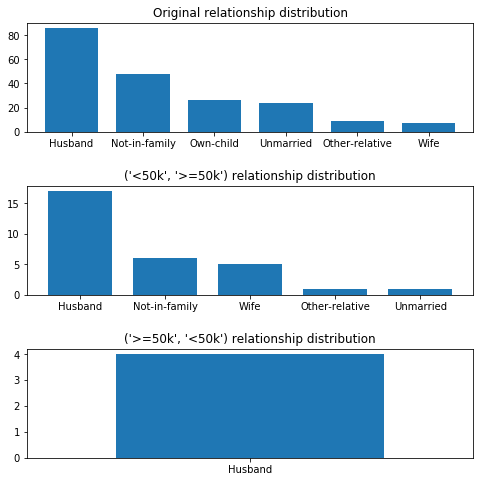

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

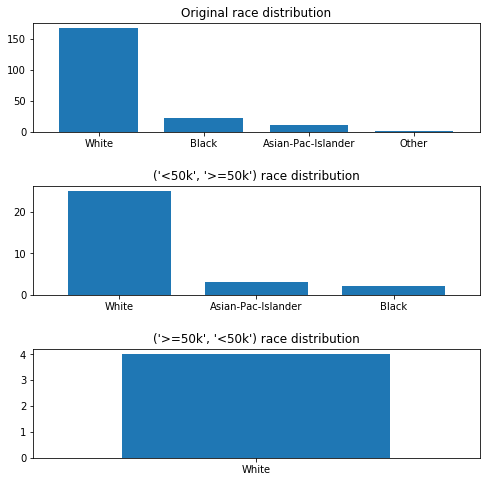

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

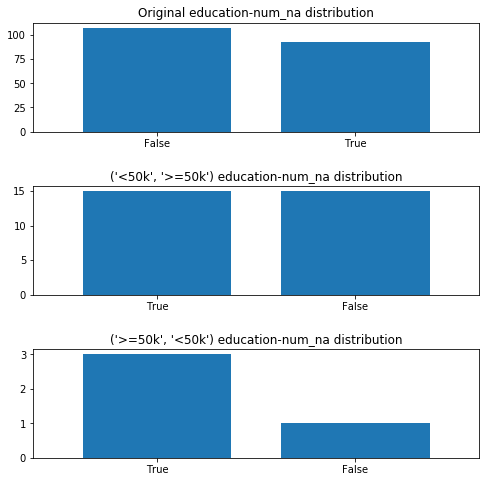

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

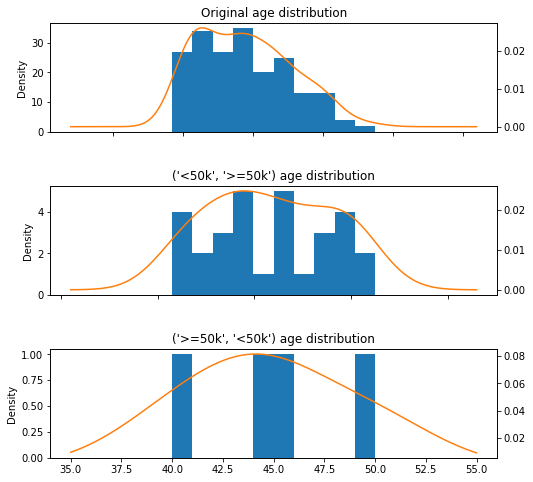

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

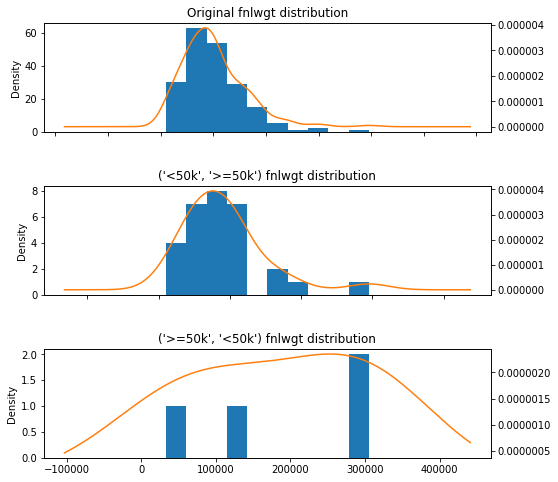

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

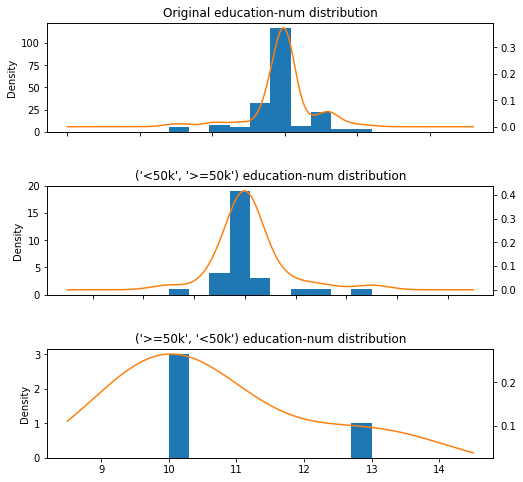

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

 10%|█         | 1/10 [00:07<01:09,  7.75s/it]


In [0]:
ClassConfusion(interp, data.classes)

## Inference

In [0]:
row = df.iloc[0]

In [0]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.4505, 0.5495]))

# Let's add a few twists

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

<h2> train_test_split </h2>

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_test_split??

Utilizes the scikit-learn library function, splits a dataframe into 90% train, 10% test dataframes

In [0]:
train, test = train_test_split(df, test_size = 0.1)

Just to verify it did a 90/10 split:

In [0]:
print(f'Train percent: {round(len(train)/len(df)*100, 3)}%')
print(f'Test percent: {round(len(test)/len(df)*100, 3)}%')
print(f'Checking overall percentage: {(len(train)+len(test))/len(df)*100}%')

Train percent: 89.997%
Test percent: 10.003%
Checking overall percentage: 100.0%


In [0]:
data = (TabularList.from_df(train, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.2)
                           .label_from_df(cols=dep_var)
                           .databunch())

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.380705,0.393443,0.803413,00:05
1,0.354749,0.354610,0.834471,00:05
2,0.356670,0.350715,0.838737,00:05


<h2> Proper Layer Size </h2>
Based on formula from here: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw



In [0]:
def calcHiddenLayer(data, alpha, numHiddenLayers:int = 2):
  if numHiddenLayers == 0:
    return []
  else:
    tempData = data.train_ds
    i, o = len(tempData.x.classes), len(tempData.y.classes)
    io = i+o
    return [(len(data.train_ds)//(alpha*(io)))//numHiddenLayers]*numHiddenLayers

In [0]:
layers = calcHiddenLayer(data, 3); layers

[434, 434]

In [0]:
learn = tabular_learner(data, layers=layers, metrics=accuracy)
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=434, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(434, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=434, out_features=434, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(434, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=434, out_features=2, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 1.00E-02


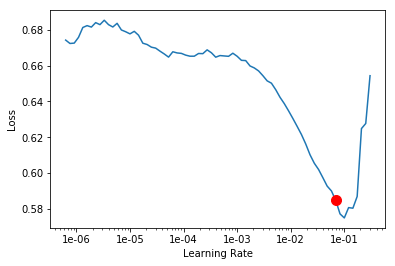

In [0]:
learn.lr_find()
lr = learn.recorder.plot(suggestion = True, return_lr=True)

In [0]:
learn.fit(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.402703,0.363149,0.827986,00:03


<h2> Getting predictions quickly </h2>
Let's analyze learn.predict() and learn.get_preds()

In [0]:
def predictions():
  for x in range(len(test)):
    learn.predict(test.iloc[x])

In [0]:
%time predictions()

CPU times: user 1min 21s, sys: 228 ms, total: 1min 22s
Wall time: 1min 22s


The 'proper' way to grade your sets

1. Create a new databunch *most* of the way
2. Make the training and validation set the same
3. Override the learner's validation set
4. Do `get_preds`, `validate`, etc

In [0]:
data_test = (TabularList.from_df(test, path=path, cat_names=cat_names, cont_names=cont_names, 
                            procs=procs, processor=learn.data.processor)
                           .split_none()
                           .label_from_df(cols=dep_var))

data_test.valid = data_test.train
data_test = data_test.databunch()

In [0]:
data_test

TabularDataBunch;

Train: LabelList (3257 items)
x: TabularList
workclass  Private; education  HS-grad; marital-status  Widowed; occupation #na#; relationship  Unmarried; race  Black; education-num_na True; age 0.3909; fnlwgt -0.1426; education-num -0.0310; ,workclass  Private; education  Bachelors; marital-status  Married-civ-spouse; occupation  Sales; relationship  Husband; race  White; education-num_na False; age -0.6348; fnlwgt -1.4497; education-num 1.1446; ,workclass  Private; education  Masters; marital-status  Never-married; occupation  Exec-managerial; relationship  Not-in-family; race  White; education-num_na False; age 0.3176; fnlwgt -1.4401; education-num 1.5364; ,workclass  Private; education  HS-grad; marital-status  Married-civ-spouse; occupation #na#; relationship  Husband; race  White; education-num_na False; age -0.1220; fnlwgt -0.1995; education-num -0.4228; ,workclass  State-gov; education  Masters; marital-status  Married-civ-spouse; occupation  Prof-specialty; rel

In [0]:
learn.data.valid_dl = data_test.valid_dl

In [0]:
%time learn.validate()

CPU times: user 235 ms, sys: 94.9 ms, total: 330 ms
Wall time: 467 ms


[0.34485316, tensor(0.8422)]